# Descompactar ZIP files

In [2]:
import zipfile
import os

def unzip_file(zip_file_path, extract_to_folder):
    # Cria a pasta de destino, se não existir
    if not os.path.exists(extract_to_folder):
        os.makedirs(extract_to_folder)
    
    # Abre o arquivo ZIP
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # Extrai todos os arquivos para a pasta de destino
        zip_ref.extractall(extract_to_folder)


# Capturar nomes dos arquivos e descompactar

In [4]:
def listar_arquivos(pasta):
    # Obter uma lista com todos os arquivos na pasta
    arquivos = os.listdir(pasta)
    paths = []
    # Filtrar apenas os arquivos (excluindo subpastas)
    #arquivos = [arquivo for arquivo in arquivos if os.path.isfile(os.path.join(pasta, arquivo))]
    for arquivo in arquivos:
        if os.path.isfile(os.path.join(pasta, arquivo)):
            p = pasta + '/' + arquivo
            paths.append(p)

    #print(arquivos, paths)
    return arquivos, paths

In [ ]:
pasta_retinog_zip = r"C:\Users\marku\Desktop\Imagens OCT Hosp porto\Imagens retinografias 2023" #arquivos zipados
pasta_retinog_dcm = r"C:\Users\marku\Desktop\Imagens OCT Hosp porto\Retinografias extraidas DCM" #arquivos dcm
pasta_retinog_jpg = r"C:\Users\marku\Desktop\Imagens OCT Hosp porto\Retinografias_jpg"#arquivos jpg

In [ ]:
arquivos, paths = listar_arquivos(pasta_retinog_zip)#coletar nomes dos arquivos

for i in range(len(arquivos)):
    id_paciente = arquivos[i].split(".")[0]
    extract_to_folder = pasta_retinog_dcm + '/' + id_paciente
    os.mkdir(extract_to_folder)#criar pastas que receberão os arq dcm
    
    # Carrega arquivos ZIP e Descompacta
    zip_file_path = pasta_retinog_dcm + '/' + arquivos[i]
    #print(zip_file_path)
    unzip_file(zip_file_path, extract_to_folder)

In [5]:
# Carrega arquivos ZIP e Descompacta
zip_file_path = r"C:\Users\marku\Desktop\Imagens OCT Hosp porto\Imagens retinografias 2023\R0577763870573_76688061.zip"
zip_file_path = zip_file_path.replace("\\", "/")
 
extract_to_folder = r"C:\Users\marku\Desktop\Imagens OCT Hosp porto\Retinografias extraidas"
extract_to_folder = extract_to_folder.replace("\\", "/")
unzip_file(zip_file_path, extract_to_folder)

# Ler arquivos DCM e converter para jpg

In [34]:
import pydicom
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def read_dicom_image(dicom_file_path, jpg_file_path):#lê e converte para jpg
    # Ler o arquivo DICOM
    dicom_data = pydicom.dcmread(dicom_file_path)
    
    # Acessar os dados da imagem
    image_array = dicom_data.pixel_array

     # Normalizar os valores dos pixels para a faixa [0, 255]
    image_array = (image_array / np.max(image_array) * 255).astype(np.uint8)
    
    # Converter o array de pixels em uma imagem PIL
    image = Image.fromarray(image_array)
    
    # Salvar a imagem como JPEG
    image.save(jpg_file_path)
    print(f"Imagem salva como: {jpg_file_path}")    
    
    return image

def display_image(image):
    # Exibir a imagem usando matplotlib
    plt.imshow(image, cmap=plt.cm.gray)
    plt.axis('off')  # Desativar os eixos
    plt.show()


In [37]:
pasta_retinog_dcm = pasta_retinog_dcm.replace("\\", "/")
arquivos_dcm, paths_dcm = listar_arquivos(pasta_retinog_dcm)#coletar nomes das pastas que contem os arquivos dcm

for i in range(len(arquivos_dcm)):
#for i in range (1):
    id_paciente = arquivos_dcm[i]
    folder_jpg = pasta_retinog_jpg + '/' + id_paciente #criar sub pasta com ID na pasta de retinografias
    os.mkdir(folder_jpg)#criar pastas que receberão os arqs jpg
    dicom_file_path = pasta_retinog_dcm + '/' + id_paciente #subpasta que contem os arquivos DCM
    #dicom_file_path = dicom_file_path.replace("\\", "/")
    j = 1
    for item in os.listdir(dicom_file_path):
        img_jpg = folder_jpg + '/' + id_paciente + '_' + str(j) +'.jpg'
        img_dcm_path = dicom_file_path + '/' + item  
        #print (img_dcm_path, img_jpg)
        j+=1
        image = read_dicom_image(img_dcm_path, img_jpg)

Imagem salva como: C:\Users\marku\Desktop\Imagens OCT Hosp porto\Retinografias_jpg/R0577763870573_76688061/R0577763870573_76688061_1.jpg
Imagem salva como: C:\Users\marku\Desktop\Imagens OCT Hosp porto\Retinografias_jpg/R0577763870573_76688061/R0577763870573_76688061_2.jpg
Imagem salva como: C:\Users\marku\Desktop\Imagens OCT Hosp porto\Retinografias_jpg/R0577763870573_76688061/R0577763870573_76688061_3.jpg
Imagem salva como: C:\Users\marku\Desktop\Imagens OCT Hosp porto\Retinografias_jpg/R0581132240573_76688056/R0581132240573_76688056_1.jpg
Imagem salva como: C:\Users\marku\Desktop\Imagens OCT Hosp porto\Retinografias_jpg/R0581132240573_76688056/R0581132240573_76688056_2.jpg
Imagem salva como: C:\Users\marku\Desktop\Imagens OCT Hosp porto\Retinografias_jpg/R0581132240573_76688056/R0581132240573_76688056_3.jpg
Imagem salva como: C:\Users\marku\Desktop\Imagens OCT Hosp porto\Retinografias_jpg/R0581132260573_76688129/R0581132260573_76688129_1.jpg
Imagem salva como: C:\Users\marku\Desktop

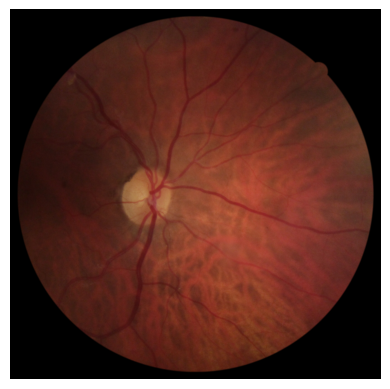

In [8]:
display_image(image)